# Explore here

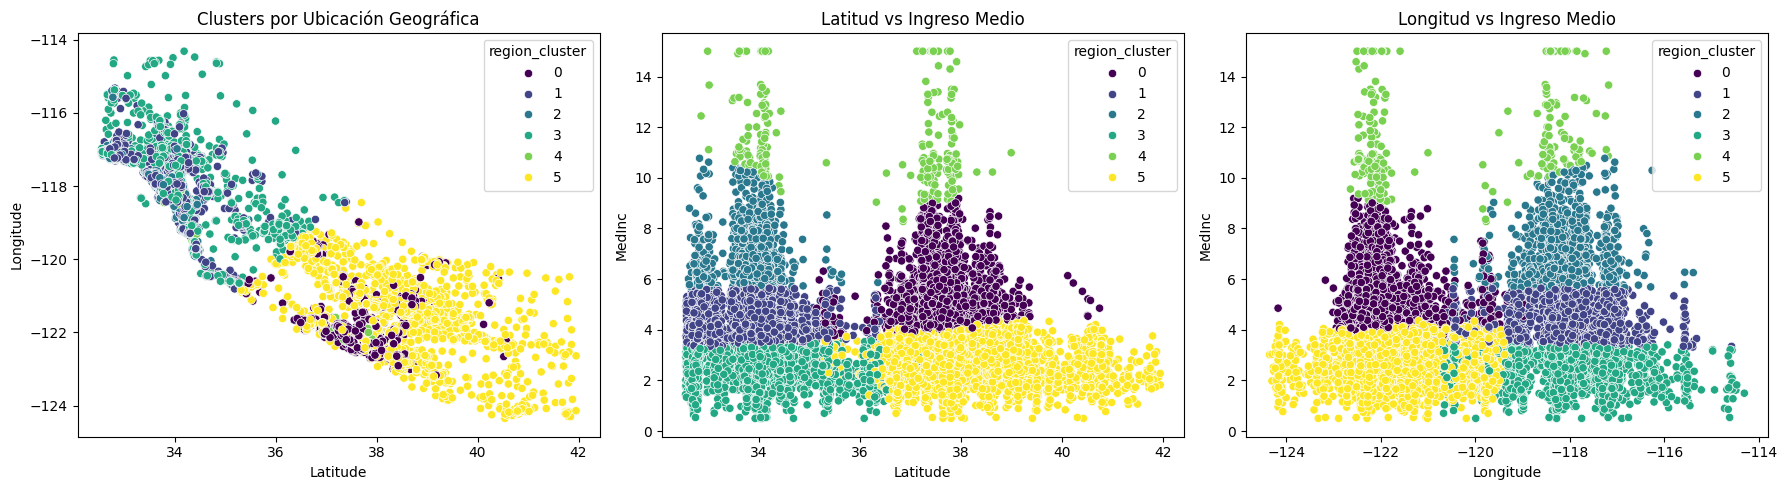

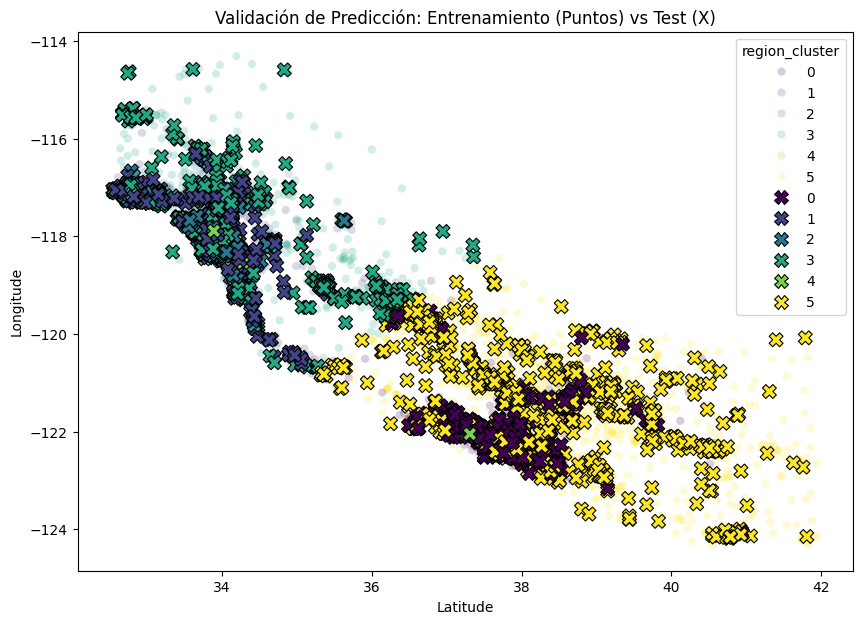

Precisión del Árbol de Decisión al imitar a K-Means: 0.9952
Modelos guardados exitosamente.


In [1]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pickle import dump


# PASO 1: Carga y Preparación del Dataset

url_viviendas = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df_california = pd.read_csv(url_viviendas)

# Seleccionamos solo las columnas de interés: Ingreso medio, Latitud y Longitud
columnas_interes = ["MedInc", "Latitude", "Longitude"]
df_filtrado = df_california[columnas_interes]

# Dividimos en entrenamiento y prueba (80/20)
# En este caso, solo dividimos X porque no tenemos etiquetas (y) originales
X_entreno, X_prueba = train_test_split(df_filtrado, test_size=0.2, random_state=42)


# PASO 2: Construcción del Modelo K-Means

# Queremos agrupar las casas en 6 regiones basadas en ubicación e ingresos
agrupador_kmeans = KMeans(n_clusters=6, n_init="auto", random_state=42)
agrupador_kmeans.fit(X_entreno)

# Generamos las etiquetas de los clusters para el conjunto de entrenamiento
etiquetas_entreno = agrupador_kmeans.labels_
X_entreno["region_cluster"] = etiquetas_entreno

# Visualización de los clusters generados

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(ax=axes[0], data=X_entreno, x="Latitude", y="Longitude", hue="region_cluster", palette="viridis")
axes[0].set_title("Clusters por Ubicación Geográfica")

sns.scatterplot(ax=axes[1], data=X_entreno, x="Latitude", y="MedInc", hue="region_cluster", palette="viridis")
axes[1].set_title("Latitud vs Ingreso Medio")

sns.scatterplot(ax=axes[2], data=X_entreno, x="Longitude", y="MedInc", hue="region_cluster", palette="viridis")
axes[2].set_title("Longitud vs Ingreso Medio")

plt.tight_layout()
plt.show()


# PASO 3: Predicción con el Conjunto de Test

# Asignamos a cada punto del test el cluster más cercano según el modelo entrenado
etiquetas_prueba = agrupador_kmeans.predict(X_prueba)
X_prueba["region_cluster"] = etiquetas_prueba

# Verificamos visualmente si los puntos de test (marcados con X) caen en las zonas correctas
plt.figure(figsize=(10, 7))
sns.scatterplot(data=X_entreno, x="Latitude", y="Longitude", hue="region_cluster", alpha=0.2, palette="viridis")
sns.scatterplot(data=X_prueba, x="Latitude", y="Longitude", hue="region_cluster", marker="X", s=100, palette="viridis", edgecolor="black")
plt.title("Validación de Predicción: Entrenamiento (Puntos) vs Test (X)")
plt.show()


# PASO 4: Modelo de Clasificación Supervisada

# Ahora que tenemos etiquetas (region_cluster), entrenamos un clasificador
# Usamos un Árbol de Decisión para aprender las reglas que definen cada cluster
clasificador_viviendas = DecisionTreeClassifier(random_state=42)

# Separamos las características de la etiqueta recién creada
X_entreno_sup = X_entreno.drop("region_cluster", axis=1)
y_entreno_sup = X_entreno["region_cluster"]

clasificador_viviendas.fit(X_entreno_sup, y_entreno_sup)

# Evaluamos la precisión con el conjunto de prueba
X_prueba_sup = X_prueba.drop("region_cluster", axis=1)
y_prueba_real = X_prueba["region_cluster"]

predicciones_sup = clasificador_viviendas.predict(X_prueba_sup)
exactitud = accuracy_score(y_prueba_real, predicciones_sup)

print(f"Precisión del Árbol de Decisión al imitar a K-Means: {exactitud:.4f}")


# PASO 5: Guardado de los Modelos

with open("../models/kmeans_viviendas_california.sav", "wb") as f_unsup:
    dump(agrupador_kmeans, f_unsup)

with open("../models/arbol_clasificador_viviendas.sav", "wb") as f_sup:
    dump(clasificador_viviendas, f_sup)

print("Modelos guardados exitosamente.")